In [2]:
#libraries and packages
!pip install torch
!pip install tqdm
import torch
import pandas as pd
from tqdm.notebook import tqdm

In [3]:
#load data
df = pd.read_csv('uk_ru_2023_en_text_random_labeled_dataset_Labelled.csv', low_memory=False)

In [4]:
df.head()

,userid,tweetid,hashtags,processed_text,topic_label,topic_weight,sentiment
0,5.467372e+07,1.630000e+18,"SlavaUkraïni,JoeBiden",repdavid support,International Support and Public Opinion,0.389973,Positive
1,2.282984e+09,1.610000e+18,"Canada,disabled,Vancouver,homeless",province editorial inequality hound population...,Strategic Military Aspects,0.464470,Irrelevant
2,2.830324e+08,1.640000e+18,ArmUkraineNow,went war russia invaded ukraine believed freed...,Strategic Military Aspects,0.613352,Positive
3,1.260000e+18,1.630000e+18,"nowplaying,alexa,streema,Scotland,echo,global,...",mintwave radio mintdry,Military Actions and Operations,0.279435,Irrelevant
4,9.241172e+08,1.640000e+18,"NATO,Russia,Kiev",military historian douglas macgregor crumble d...,Broad Overview of the Conflict,0.434376,Negative


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494540 entries, 0 to 494539
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   userid          494540 non-null  float64
 1   tweetid         494540 non-null  float64
 2   hashtags        492068 non-null  object 
 3   processed_text  494162 non-null  object 
 4   topic_label     494540 non-null  object 
 5   topic_weight    494540 non-null  float64
 6   sentiment       494540 non-null  object 
dtypes: float64(3), object(4)
memory usage: 26.4+ MB


In [6]:
df.isnull().sum()

userid               0
tweetid              0
hashtags          2472
processed_text     378
topic_label          0
topic_weight         0
sentiment            0
dtype: int64

In [7]:
df.sentiment.value_counts()

sentiment
nocode        489540
Negative        1448
Neutral         1428
Irrelevant      1267
Positive         857
Name: count, dtype: int64

In [8]:
df = df[df.sentiment != 'nocode']

In [9]:
df.sentiment.value_counts()

sentiment
Negative      1448
Neutral       1428
Irrelevant    1267
Positive       857
Name: count, dtype: int64

In [10]:
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

<Figure size 1000x500 with 0 Axes>

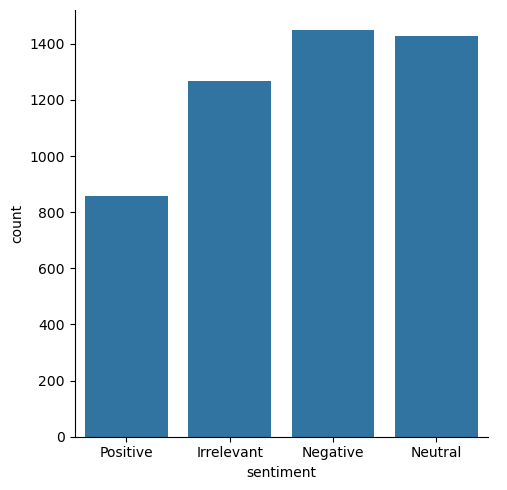

In [11]:
plt.figure(figsize=(10, 5))
sns.catplot(x='sentiment', kind='count', data=df) 

In [12]:
possible_labels = df.sentiment.unique()
possible_labels

array(['Positive', 'Irrelevant', 'Negative', 'Neutral'], dtype=object)

In [13]:
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [14]:
label_dict

{'Positive': 0, 'Irrelevant': 1, 'Negative': 2, 'Neutral': 3}

In [15]:
df['label'] = df.sentiment.replace(label_dict)
df.head(10)

,userid,tweetid,hashtags,processed_text,topic_label,topic_weight,sentiment,label
0,5.467372e+07,1.630000e+18,"SlavaUkraïni,JoeBiden",repdavid support,International Support and Public Opinion,0.389973,Positive,0
1,2.282984e+09,1.610000e+18,"Canada,disabled,Vancouver,homeless",province editorial inequality hound population...,Strategic Military Aspects,0.464470,Irrelevant,1
2,2.830324e+08,1.640000e+18,ArmUkraineNow,went war russia invaded ukraine believed freed...,Strategic Military Aspects,0.613352,Positive,0
3,1.260000e+18,1.630000e+18,"nowplaying,alexa,streema,Scotland,echo,global,...",mintwave radio mintdry,Military Actions and Operations,0.279435,Irrelevant,1
4,9.241172e+08,1.640000e+18,"NATO,Russia,Kiev",military historian douglas macgregor crumble d...,Broad Overview of the Conflict,0.434376,Negative,2
5,9.019142e+06,1.610000e+18,"news,canada,handsanitizer,Sask,saskatchewan,sk...",sask washing hand pallet expired hand sanitizer,Civilian Support and Information Sharing,0.279660,Irrelevant,1
6,1.510000e+18,1.620000e+18,"Nazi,RussiaIsATerroristState",bggestman protossstan marcova beatkoine dimkq ...,International Support and Public Opinion,0.449647,Negative,2
7,7.720000e+17,1.650000e+18,"RussiaIsANaziState,RussiaInvadedUkraine,Russia...",today satan hard,Broad Overview of the Conflict,0.337738,Negative,2
8,1.062505e+08,1.650000e+18,"Ukraine,Anonymous,OpRussia,UkraineRussiaWar️,R...",elon musk jump viral tweet tagged notification...,Broad Overview of the Conflict,0.606890,Neutral,3
9,8.716686e+08,1.650000e+18,"FreeKaraMurza,Russian,Putin,Ukraine",fixed unfair trail leading political oppositio...,International Support and Public Opinion,0.559300,Positive,0


<Axes: ylabel='Count'>

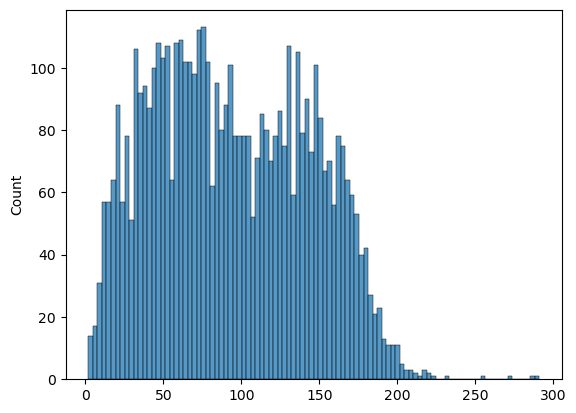

In [16]:
df['processed_text'] = df['processed_text'].astype(str)
lengths = [len(s) for s in df.processed_text]
sns.histplot(lengths, bins=100) 

In [17]:
max_len = max(lengths)
print('Max length: ', max_len)

Max length:  291


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                   df.label.values,
                                                   test_size = 0.15,
                                                   random_state = 17,
                                                   stratify = df.label.values)

In [19]:
df['data_type'] = ['not_set'] * df.shape[0]
df.head()

,userid,tweetid,hashtags,processed_text,topic_label,topic_weight,sentiment,label,data_type
0,5.467372e+07,1.630000e+18,"SlavaUkraïni,JoeBiden",repdavid support,International Support and Public Opinion,0.389973,Positive,0,not_set
1,2.282984e+09,1.610000e+18,"Canada,disabled,Vancouver,homeless",province editorial inequality hound population...,Strategic Military Aspects,0.464470,Irrelevant,1,not_set
2,2.830324e+08,1.640000e+18,ArmUkraineNow,went war russia invaded ukraine believed freed...,Strategic Military Aspects,0.613352,Positive,0,not_set
3,1.260000e+18,1.630000e+18,"nowplaying,alexa,streema,Scotland,echo,global,...",mintwave radio mintdry,Military Actions and Operations,0.279435,Irrelevant,1,not_set
4,9.241172e+08,1.640000e+18,"NATO,Russia,Kiev",military historian douglas macgregor crumble d...,Broad Overview of the Conflict,0.434376,Negative,2,not_set


In [20]:
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

In [21]:
df.groupby(['sentiment', 'label', 'data_type']).count()

userid  tweetid  hashtags  processed_text  \
sentiment  label data_type                                              
Irrelevant 1     train        1077     1077      1065            1077   
                 val           190      190       188             190   
Negative   2     train        1231     1231      1226            1231   
                 val           217      217       216             217   
Neutral    3     train        1214     1214      1211            1214   
                 val           214      214       214             214   
Positive   0     train         728      728       726             728   
                 val           129      129       129             129   

                            topic_label  topic_weight  
sentiment  label data_type                             
Irrelevant 1     train             1077          1077  
                 val                190           190  
Negative   2     train             1231          1231  
                 val                217           217  
Neutral    3     train             1214          1214  
                 val                214           214  
Positive   0     train              728           728  
                 val                129           129

In [22]:
!pip install transformers

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [23]:
#load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)

In [24]:
#tokenize train set
encoded_data_train = tokenizer.batch_encode_plus(df[df.data_type == 'train'].processed_text.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 290,
                                                return_tensors = 'pt')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\Jiaxing Yan\.conda\envs\gpuenv\Lib\site-packages\transformers\tokenization_utils_base.py:2688: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [25]:
encoded_data_val = tokenizer.batch_encode_plus(df[df.data_type == 'val'].processed_text.values,
                                                #add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 150,
                                                return_tensors = 'pt')

In [26]:
encoded_data_train

{'input_ids': tensor([[  101, 16360, 29045,  ...,     0,     0,     0],
        [  101,  2874,  8368,  ...,     0,     0,     0],
        [  101,  2253,  2162,  ...,     0,     0,     0],
        ...,
        [  101, 16216,  8180,  ...,     0,     0,     0],
        [  101,  5969, 18465,  ...,     0,     0,     0],
        [  101,  4190,  4183,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [27]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type == 'train'].label.values)

In [28]:
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']

#convert data type to torch.tensor
labels_val = torch.tensor(df[df.data_type == 'val'].label.values)

In [29]:
input_ids_train

tensor([[  101, 16360, 29045,  ...,     0,     0,     0],
        [  101,  2874,  8368,  ...,     0,     0,     0],
        [  101,  2253,  2162,  ...,     0,     0,     0],
        ...,
        [  101, 16216,  8180,  ...,     0,     0,     0],
        [  101,  5969, 18465,  ...,     0,     0,     0],
        [  101,  4190,  4183,  ...,     0,     0,     0]])

In [30]:
attention_masks_train

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [31]:
labels_train

tensor([0, 1, 0,  ..., 2, 3, 1])

In [32]:
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val, 
                             attention_masks_val, 
                             labels_val)

In [33]:
print(len(dataset_train))
print(len(dataset_val))

4250
750


In [34]:
dataset_train

In [35]:
dataset_train.tensors

(tensor([[  101, 16360, 29045,  ...,     0,     0,     0],
         [  101,  2874,  8368,  ...,     0,     0,     0],
         [  101,  2253,  2162,  ...,     0,     0,     0],
         ...,
         [  101, 16216,  8180,  ...,     0,     0,     0],
         [  101,  5969, 18465,  ...,     0,     0,     0],
         [  101,  4190,  4183,  ...,     0,     0,     0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([0, 1, 0,  ..., 2, 3, 1]))

In [36]:
from transformers import BertForSequenceClassification

#load pre-trained BERT
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.39.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [38]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4 #since we have limited resource

#load train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train), batch_size = batch_size)

#load val set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),batch_size = 32)

In [39]:
from transformers import AdamW, get_linear_schedule_with_warmup
epochs = 10

#load optimizer
optimizer = torch.optim.AdamW(model.parameters(),
                 lr = 1e-5,
                 eps = 1e-8) #2e-5 > 5e-5

In [40]:
#load scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps = 0,
                                           num_training_steps = len(dataloader_train)*epochs)

In [41]:
import numpy as np
from sklearn.metrics import f1_score

#f1 score
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')

In [42]:
#accuracy score
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    #make prediction
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [43]:
def evaluate(dataloader_val):

    #evaluation mode disables the dropout layer 
    model.eval()
    
    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in tqdm(dataloader_val):
        
        #load into GPU
        batch = tuple(b.to(device) for b in batch)
        
        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2]}

        #compute logits
        with torch.no_grad():        
            outputs = model(**inputs)
        
        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [44]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [45]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [46]:
!pip install ipywidgets
for epoch in tqdm(range(1, epochs+1)):

    #set model in train mode
    model.train()

    #tracking variable
    loss_train_total = 0
    
    #set up progress bar
    progress_bar = tqdm(dataloader_train, 
                        desc='Epoch {:1d}'.format(epoch), 
                        leave=False, 
                        disable=False)
    
    for batch in progress_bar:
        #set gradient to 0
        model.zero_grad()

        #load into GPU
        batch = tuple(b.to(device) for b in batch)

        #define inputs
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}
        
        outputs = model(**inputs)
        loss = outputs[0] #output.loss
        loss_train_total +=loss.item()

        #backward pass to get gradients
        loss.backward()
        
        #clip the norm of the gradients to 1.0 to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        #update optimizer
        optimizer.step()

        #update scheduler
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})     
    
    tqdm.write('\nEpoch {epoch}')
    
    #print training result
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    #evaluate
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    #f1 score
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1063 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 1.0426408740869695


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 0.9033471047878265
F1 Score (weighted): 0.6298558828572947


Epoch 2:   0%|          | 0/1063 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.731980663830255


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 0.9171478810409704
F1 Score (weighted): 0.6568091339193395


Epoch 3:   0%|          | 0/1063 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.5658689024100327


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 1.09618033717076
F1 Score (weighted): 0.6748792646515723


Epoch 4:   0%|          | 0/1063 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.422063780106124


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 1.5770773490269978
F1 Score (weighted): 0.6576257945036867


Epoch 5:   0%|          | 0/1063 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.31116786235057453


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 1.980877734720707
F1 Score (weighted): 0.6487233685576419


Epoch 6:   0%|          | 0/1063 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.24185089160305354


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 2.052207864820957
F1 Score (weighted): 0.6595700253889045


Epoch 7:   0%|          | 0/1063 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.18159906738077405


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 2.146618594725927
F1 Score (weighted): 0.6586593985354707


Epoch 8:   0%|          | 0/1063 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.14740118937583194


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 2.228815217812856
F1 Score (weighted): 0.6594323693511053


Epoch 9:   0%|          | 0/1063 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.11581027844523979


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 2.3969001223643622
F1 Score (weighted): 0.6517747222130758


Epoch 10:   0%|          | 0/1063 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.10239114528814576


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 2.407915567358335
F1 Score (weighted): 0.6593710009017631


In [47]:
outputs.loss

tensor(0.0369, device='cuda:0', grad_fn=<NllLossBackward0>)

In [48]:
outputs.logits

tensor([[ 7.0726, -2.0789, -2.3349, -2.3007],
        [-3.4426,  1.5715,  4.1578, -3.5740]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [49]:
model.to(device)
pass

In [50]:
_, predictions, true_vals = evaluate(dataloader_val)

  0%|          | 0/24 [00:00<?, ?it/s]

In [51]:
accuracy_per_class(predictions, true_vals)

Class: Positive
Accuracy:74/129

Class: Irrelevant
Accuracy:126/190

Class: Negative
Accuracy:139/217

Class: Neutral
Accuracy:156/214



In [55]:
model.save_pretrained("./saved_model")

In [95]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from tqdm import tqdm 
import torch

# Load dataset
dataset = pd.read_csv('uk_ru_2023_en_text_random_labeled_dataset_Labelled.csv', low_memory=False)
dataset = dataset[dataset.sentiment == 'nocode']
dataset['processed_text'] = dataset['processed_text'].astype(str)

# Load model and tokenizer
model_path = "./saved_model" 
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Create sentiment analysis pipeline
pipe = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, 
                device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')) 

# Define batching parameters
batch_size = 32 # Adjust this based on your GPU memory

# Define a function to process a batch of texts
def process_batch(texts):
    results = pipe(texts, batch_size=batch_size)  # Process in batches
    return [result['label'] for result in results]

# Apply sentiment classification with batching
all_predicted_sentiments = []
for i in tqdm(range(0, len(dataset), batch_size)):
    batch = dataset['processed_text'].iloc[i: i+batch_size].tolist()  # Convert to a list of strings
    batch_sentiments = process_batch(batch)
    all_predicted_sentiments.extend(batch_sentiments)

dataset['predicted_sentiment'] = all_predicted_sentiments

# Calculate sentiment distribution
sentiment_counts = dataset['predicted_sentiment'].value_counts()
total_count = len(dataset)
sentiment_percentages = (sentiment_counts / total_count) * 100

print("Sentiment Distribution:")
print(sentiment_percentages)

100%|██████████| 15299/15299 [09:58<00:00, 25.55it/s]

Sentiment Distribution:
predicted_sentiment
LABEL_3    31.536953
LABEL_2    28.294726
LABEL_1    23.578257
LABEL_0    16.590064
Name: count, dtype: float64
